# 1. 패키지 불러오기

In [135]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

# 경고창 무시하기
import warnings
warnings.filterwarnings('ignore')

# 모든 열 확인하기
pd.set_option('display.max_columns', None)

# 2. 데이터 불러오기

In [104]:
train=pd.read_csv("./dataset/train_data.csv")
test=pd.read_csv("./dataset/test_data.csv")
answer=pd.read_csv("./dataset/answer_sample.csv")

In [105]:
print(train.shape)
print(test.shape) # test가 압도적으로 많다

(2463, 8)
(7389, 8)


In [106]:
# 원본 데이터 변형없이 유지하기 위하여 복제하기
train_copy=train.copy()
train_copy=test.copy()

# 3. 데이터 형태 확인하기

* Step 1. air_inflow (압축하기 전 필터된 대기 공기)
* Step 2. motor_current, motor_rpm, motor_temp, motor_vibe
* Step 3. 
* Step 4. out_pressure 
* Step 5. air_inflow
* 반복 ...

In [53]:
train_copy.info() # 모든 열이 문자열이 아니다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     7389 non-null   float64
 1   air_end_temp   7389 non-null   float64
 2   out_pressure   7389 non-null   float64
 3   motor_current  7389 non-null   float64
 4   motor_rpm      7389 non-null   float64
 5   motor_temp     7389 non-null   float64
 6   motor_vibe     7389 non-null   float64
 7   type           7389 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 461.9 KB


In [54]:
train_copy.isnull().sum() # 결측치 없다

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [62]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,7389.0,2.103129,1.163998,0.34,1.28,1.94,2.77,6.24
air_end_temp,7389.0,49.042735,8.686208,32.08,41.51,48.76,56.58,65.54
out_pressure,7389.0,0.699840,0.005377,0.49,0.70,0.70,0.70,0.70
motor_current,7389.0,27.417935,13.234089,5.37,17.20,26.17,35.86,74.00
motor_rpm,7389.0,2373.820003,687.737182,1200.00,1774.00,2355.00,2972.00,3564.00
motor_temp,7389.0,65.771623,7.741473,50.42,59.11,65.52,72.44,82.39
motor_vibe,7389.0,3.345523,0.644199,1.97,2.89,3.26,3.73,6.26
type,7389.0,2.957369,2.229811,0.00,1.00,3.00,5.00,7.00


## 3-1. 데이터의 상관관계 파악하기

<Figure size 1500x1500 with 0 Axes>

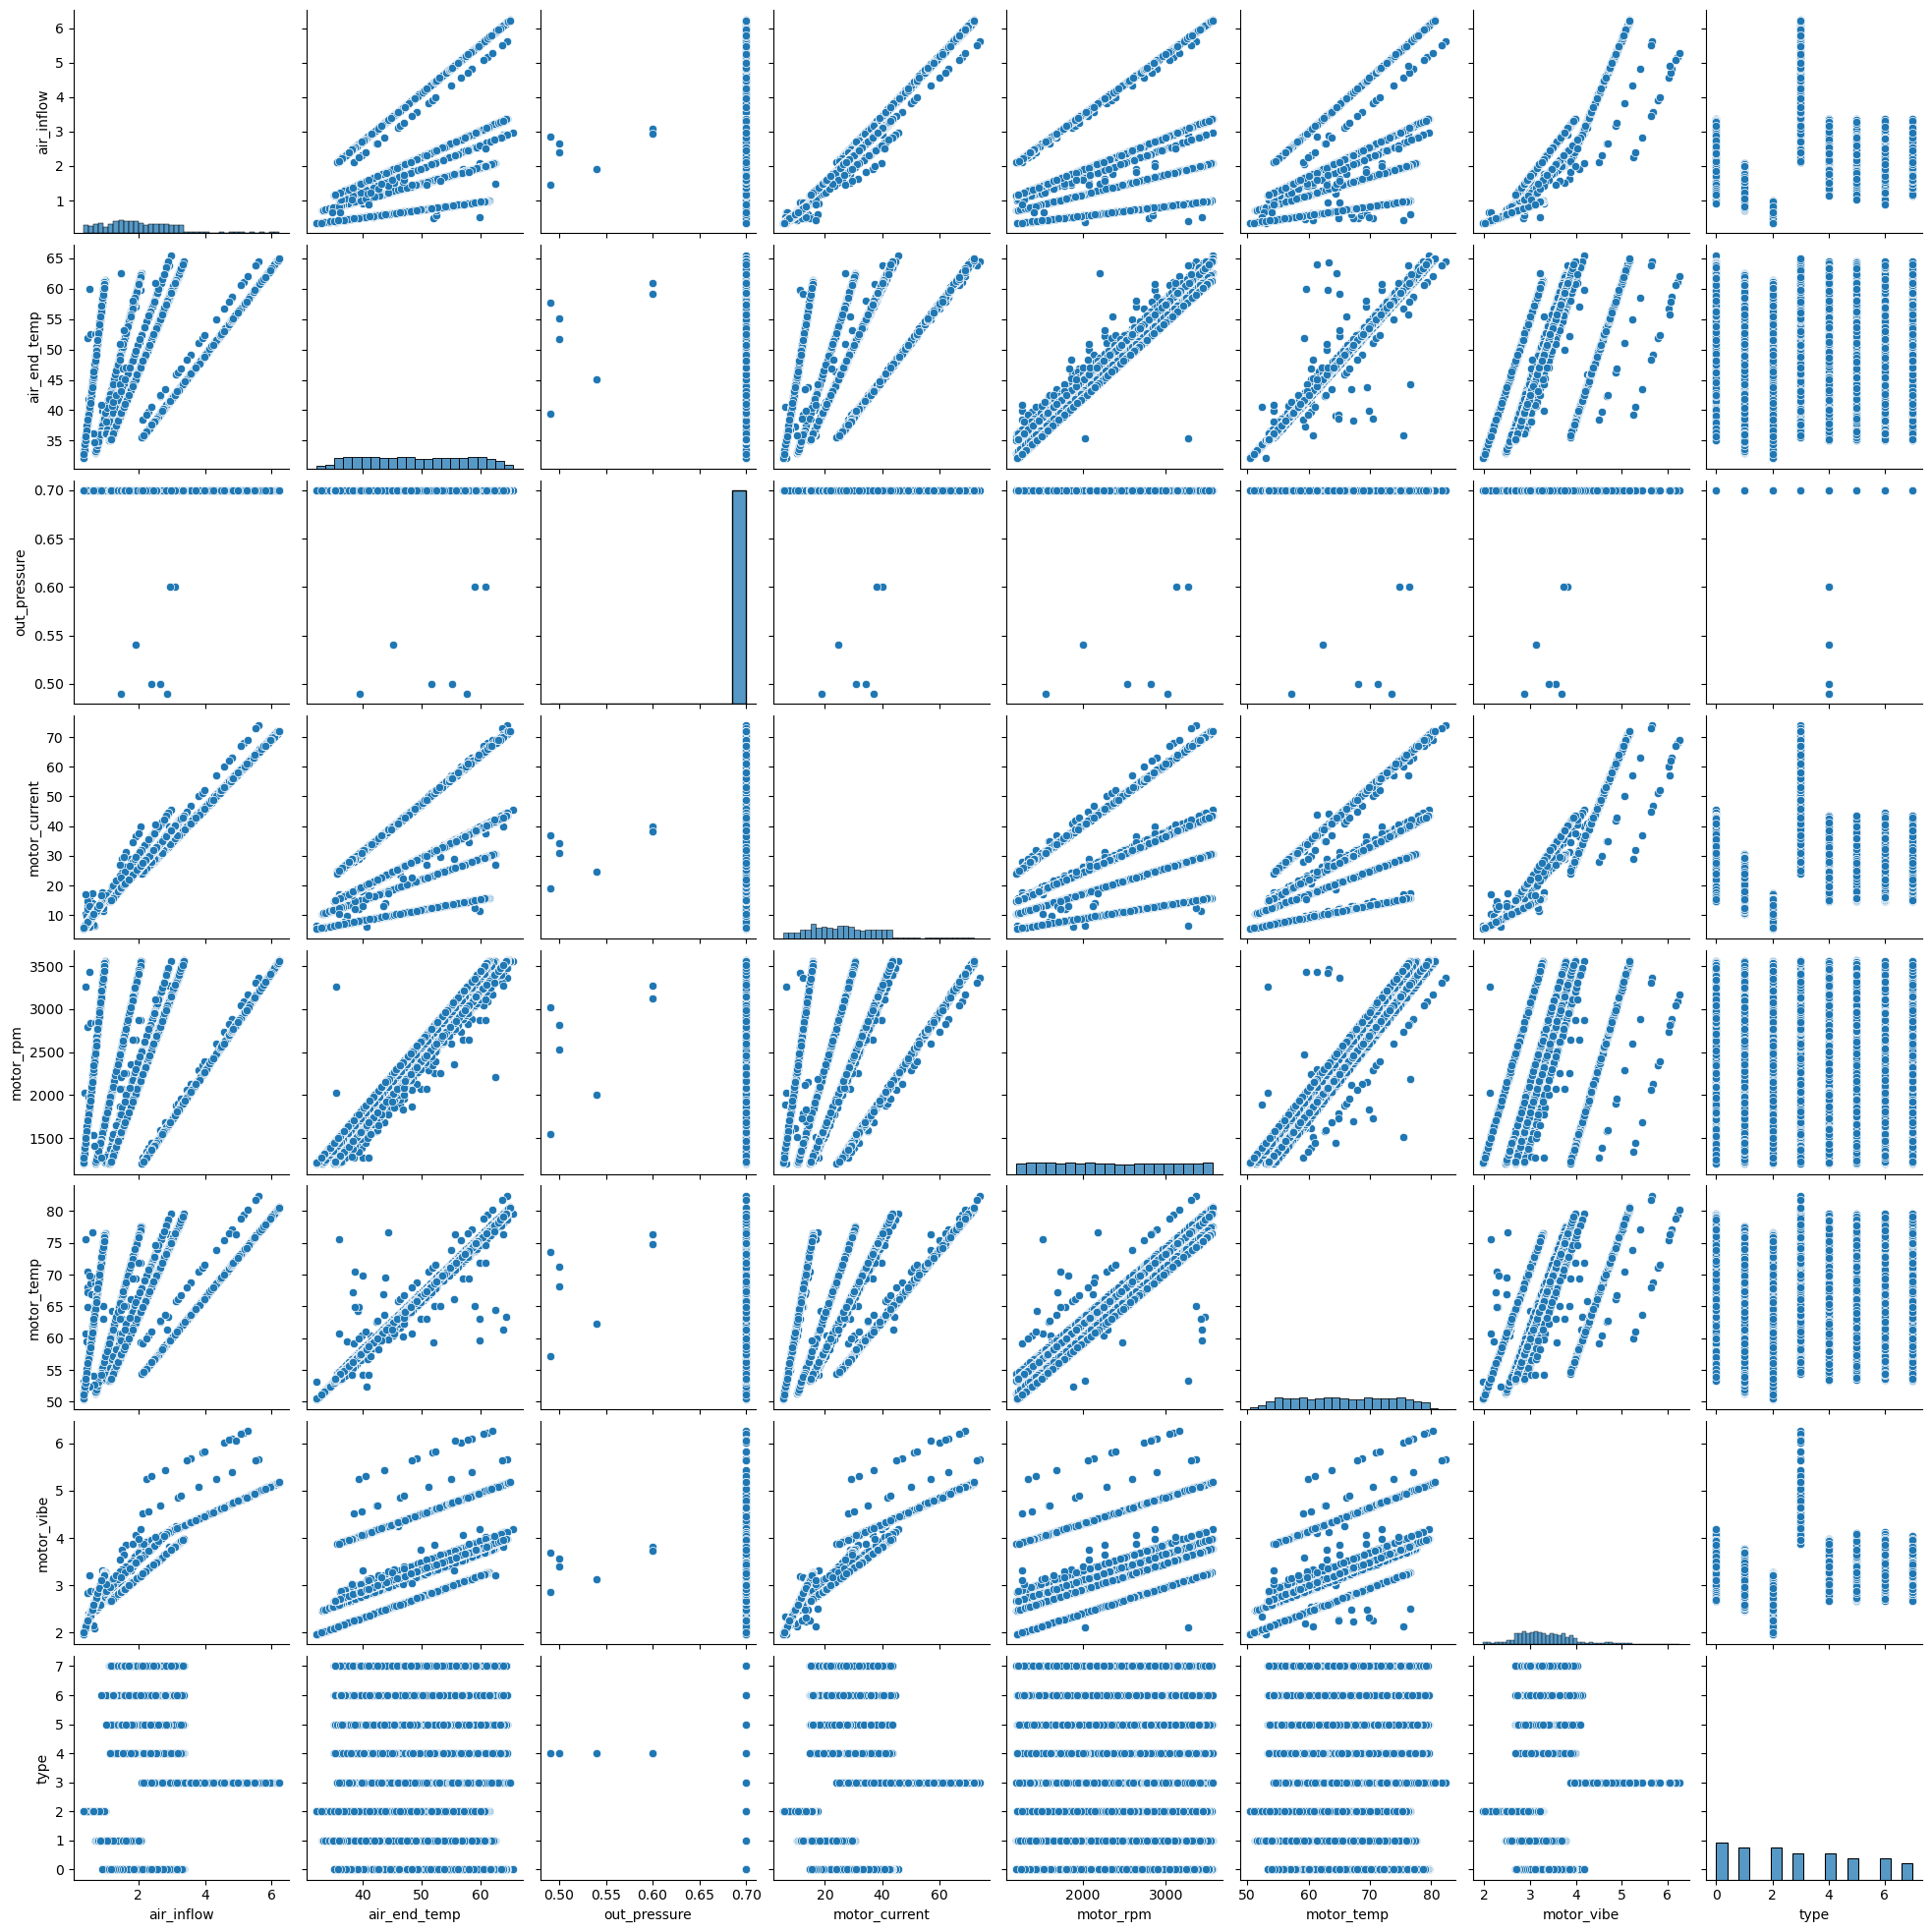

In [6]:
plt.figure(figsize=(15, 15))
_=sns.pairplot(train_copy)
plt.show()

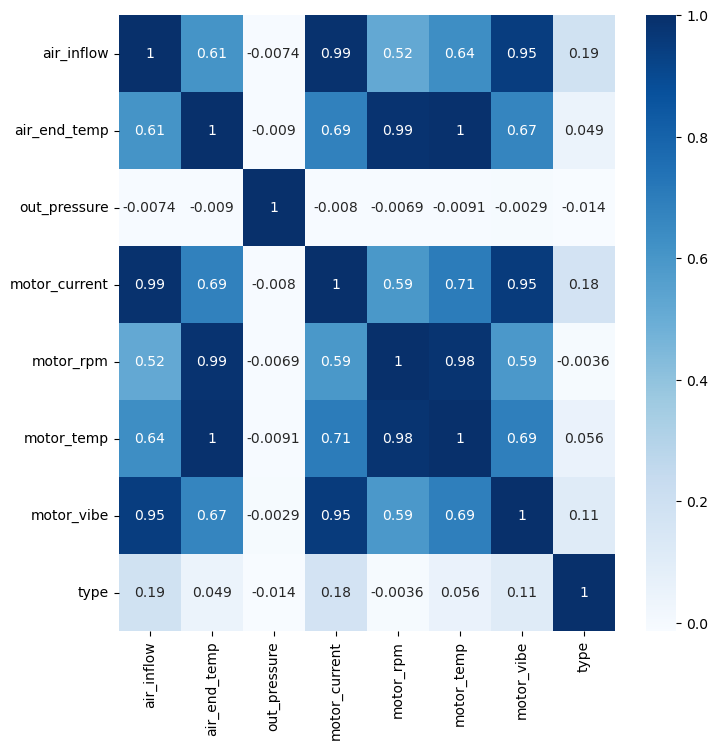

In [7]:
plt.figure(figsize=(8, 8))
_=sns.heatmap(train_copy.corr(), annot=True, cmap="Blues")
plt.show()

높은 양의 상관관계를 가지는 칼럼들이 많다.
* 1
* 0.99 
* 0.98
* 0.95

## 3-2. 각각의 데이터 칼럼의 분포 알아보기

In [28]:
train_copy.groupby(["type"]).size()

type
0    1296
1    1107
2    1098
3     918
4     918
5     747
6     747
7     558
dtype: int64

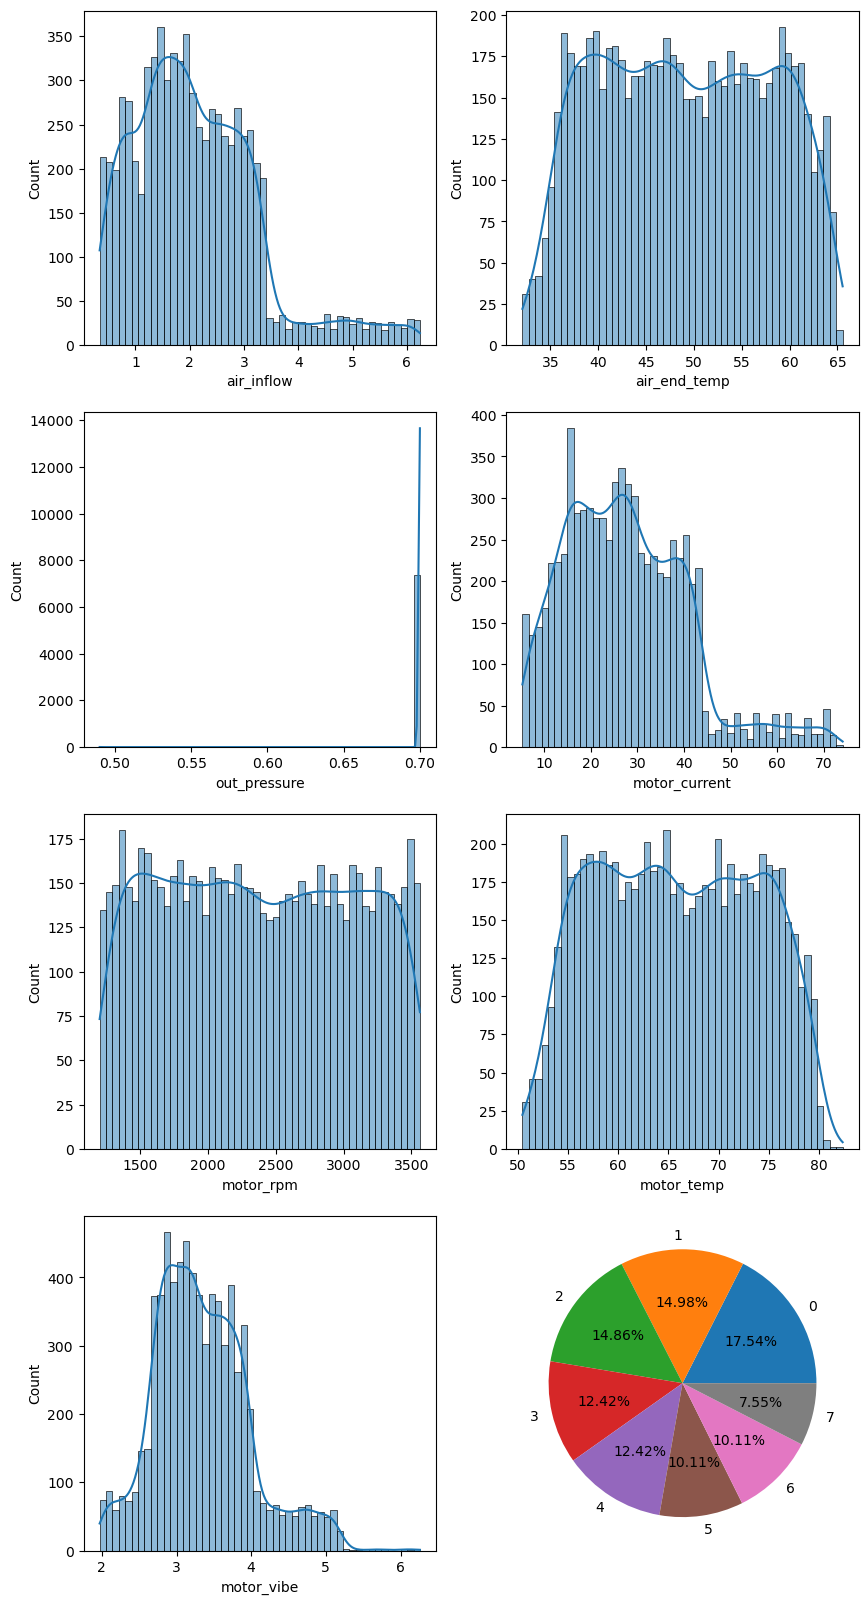

In [33]:
fig, ax=plt.subplots(4, 2, figsize=(10, 20))
ax=ax.flatten()

# 공기 흡입 유량
_=sns.histplot(train_copy, x="air_inflow", bins=50, kde=True, ax=ax[0])

# 공기 말단 온도
_=sns.histplot(train_copy, x="air_end_temp", bins=50, kde=True, ax=ax[1])

# 토출 압력
_=sns.histplot(train_copy, x="out_pressure", bins=50, kde=True, ax=ax[2])

# 모터 전류
_=sns.histplot(train_copy, x="motor_current", bins=50, kde=True, ax=ax[3])

# 모터 회전수
_=sns.histplot(train_copy, x="motor_rpm", bins=50, kde=True, ax=ax[4])

# 모터 온도
_=sns.histplot(train_copy, x="motor_temp", bins=50, kde=True, ax=ax[5])

# 모터 진동
_=sns.histplot(train_copy, x="motor_vibe", bins=50, kde=True, ax=ax[6])

# 설비 번호
_=train_copy.groupby(["type"]).size().plot.pie(ax=ax[7], autopct="%.2f%%")
_=ax[7].set_ylabel("")

In [38]:
# 공기 흡입 유량
print(train_copy["air_inflow"].min(), train_copy["air_inflow"].max())

# 모터 전류
print(train_copy["motor_current"].min(), train_copy["motor_current"].max())

# 모터 진동
print(train_copy["motor_vibe"].min(), train_copy["motor_vibe"].max())

0.34 6.24
5.37 74.0
1.97 6.26


In [37]:
# 공기 말단 온도
print(train_copy["air_end_temp"].min(), train_copy["air_end_temp"].max())

# 모터 회전수
print(train_copy["motor_rpm"].min(), train_copy["motor_rpm"].max())

# 모터 온도
print(train_copy["motor_temp"].min(), train_copy["motor_temp"].max())

32.08 65.54
1200.0 3564.0
50.42 82.39


3가지 칼럼끼리 관련성이 높아보인다.

In [43]:
# 토출 압력
train_copy["out_pressure"].unique()

array([0.7 , 0.6 , 0.54, 0.5 , 0.49])

In [50]:
train_copy.groupby(["out_pressure"]).size()

out_pressure
0.49       2
0.50       2
0.54       1
0.60       2
0.70    7382
dtype: int64

* 레이블 인코딩 : 문자열 없으므로 안 해도 될 것 같다.
* 원핫인코딩 : 회귀 분석 할거 아니니까 안 해도 될 것 같다.
* 피처 스케일링 및 정규화 : 다 다른 값을 가지고 있기 때문에 해야될 것 같다.

In [59]:
print(train_copy["out_pressure"].skew())
# 오른쪽으로 치우쳐져 있다

-35.283080332532734


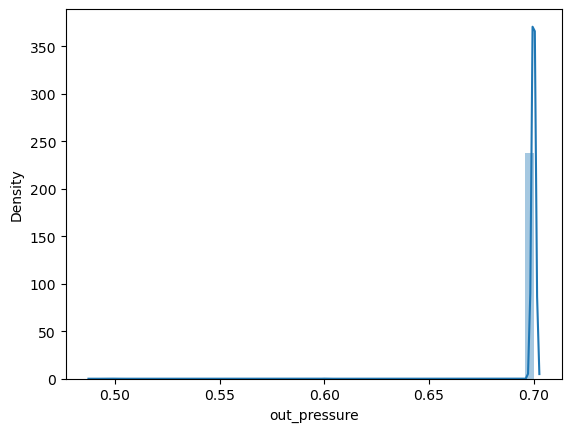

In [72]:
_=sns.distplot(train_copy["out_pressure"])
# 편향된 분포 정규 분포화 시켜주기 위한 log 변환해야하나? 잘 모르겠다

# 4. Cluster Map

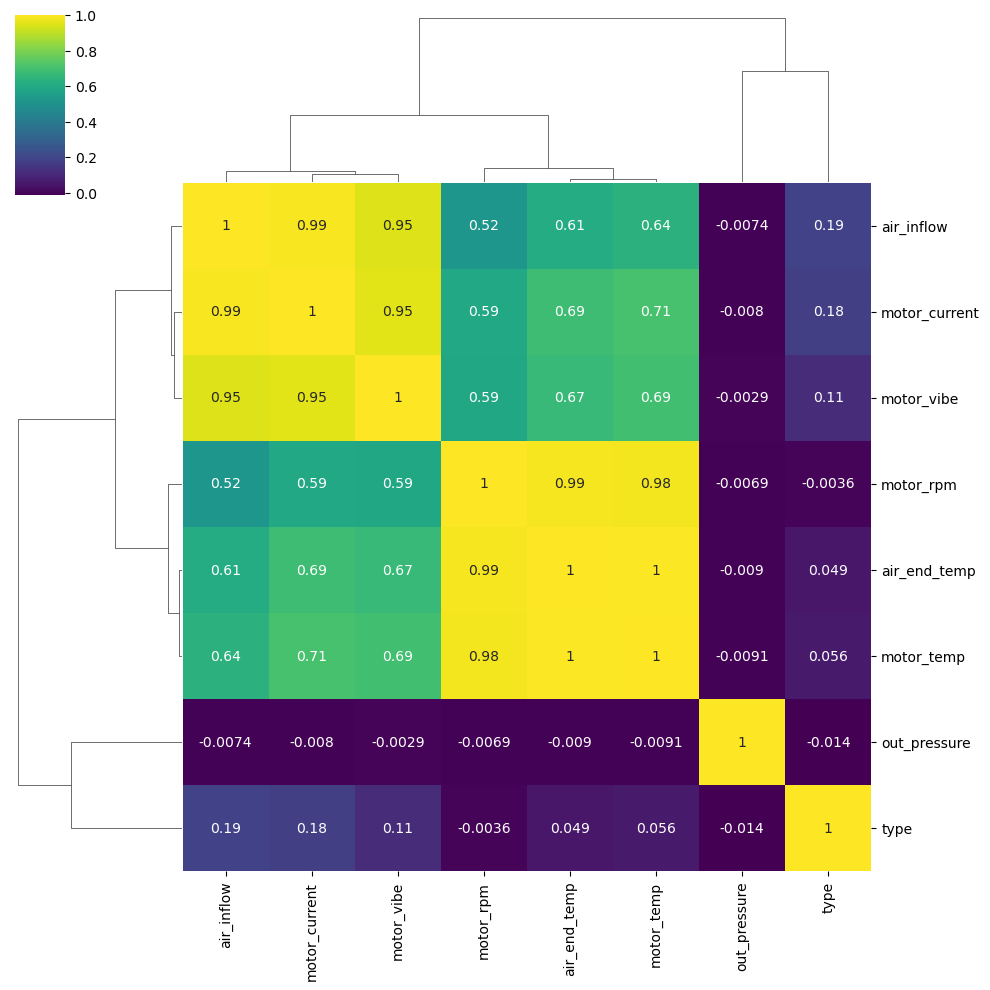

In [73]:
_=sns.clustermap(train_copy.corr(), annot=True, cmap="viridis")

유사성에 따라 몇몇의 특징을 그룹화 진행하기.

# 5. 이상치 확인하기

In [115]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,7389.0,2.103129,1.163998,0.34,1.28,1.94,2.77,6.24
air_end_temp,7389.0,49.042735,8.686208,32.08,41.51,48.76,56.58,65.54
out_pressure,7389.0,0.699840,0.005377,0.49,0.70,0.70,0.70,0.70
motor_current,7389.0,27.417935,13.234089,5.37,17.20,26.17,35.86,74.00
motor_rpm,7389.0,2373.820003,687.737182,1200.00,1774.00,2355.00,2972.00,3564.00
motor_temp,7389.0,65.771623,7.741473,50.42,59.11,65.52,72.44,82.39
motor_vibe,7389.0,3.345523,0.644199,1.97,2.89,3.26,3.73,6.26
type,7389.0,2.957369,2.229811,0.00,1.00,3.00,5.00,7.00


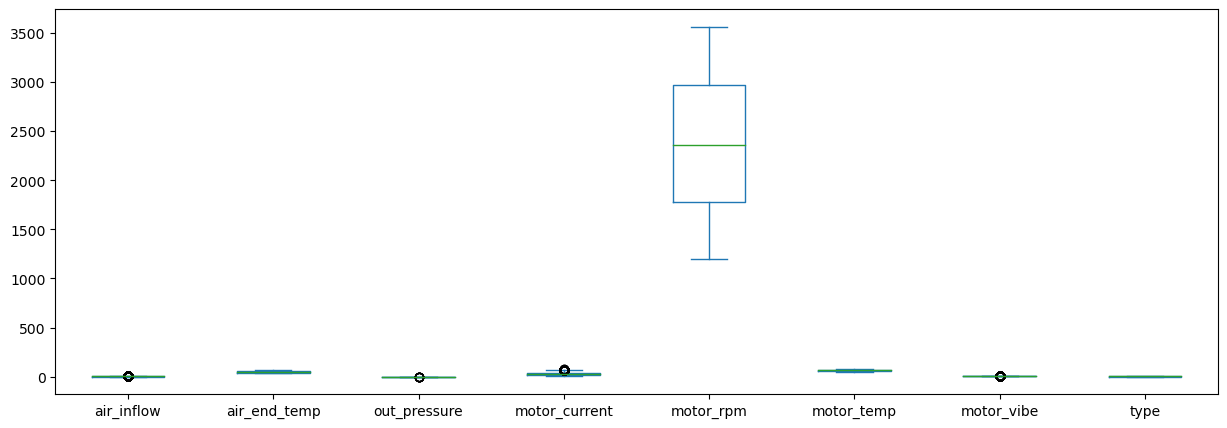

In [99]:
_=fig, ax=plt.subplots(1, 1, figsize=(15, 5))
_=train_copy.plot.box(ax=ax)

모터 회전수가 압도적으로 높아서 다른 칼럼들의 상태를 확인할 수 없기 때문에 일단 제거하고 박스 모델 그려보기.

In [107]:
train_box=train_copy.drop("motor_rpm", axis=1)

In [108]:
train_box

,air_inflow,air_end_temp,out_pressure,motor_current,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,69.58,3.48,0
1,2.66,55.24,0.7,34.45,71.32,3.57,0
2,1.72,42.74,0.7,22.23,60.21,3.01,0
3,2.20,49.15,0.7,28.50,65.91,3.30,0
4,2.06,47.28,0.7,26.67,64.24,3.21,0
...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,64.96,3.25,7
7385,1.48,39.63,0.7,19.19,57.44,2.87,7
7386,1.56,40.61,0.7,20.15,58.32,2.92,7
7387,1.59,40.99,0.7,20.52,58.66,2.93,7


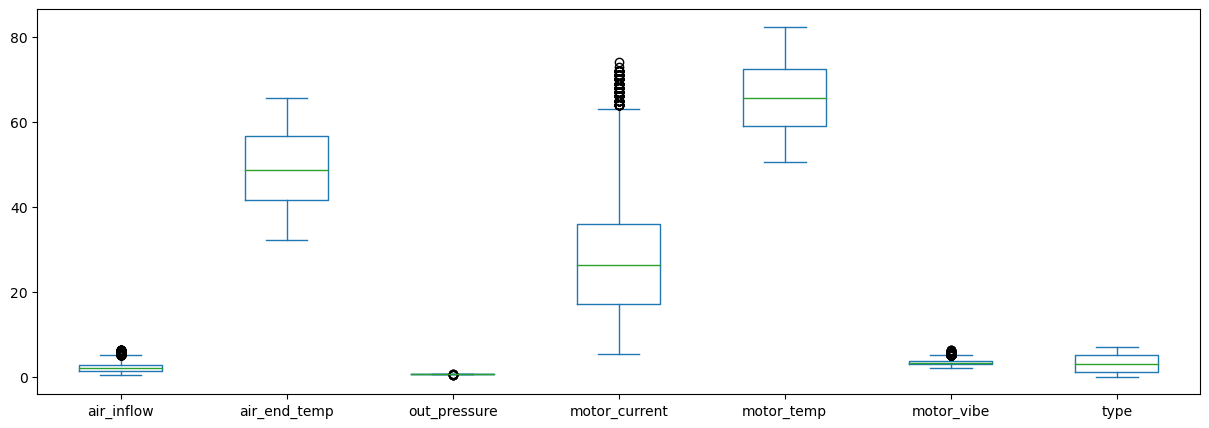

In [109]:
_=fig, ax=plt.subplots(1, 1, figsize=(15, 5))
_=train_box.plot.box(ax=ax)

공기 말단 온도와 모터 온도, 설비번호는 이상치가 없다.

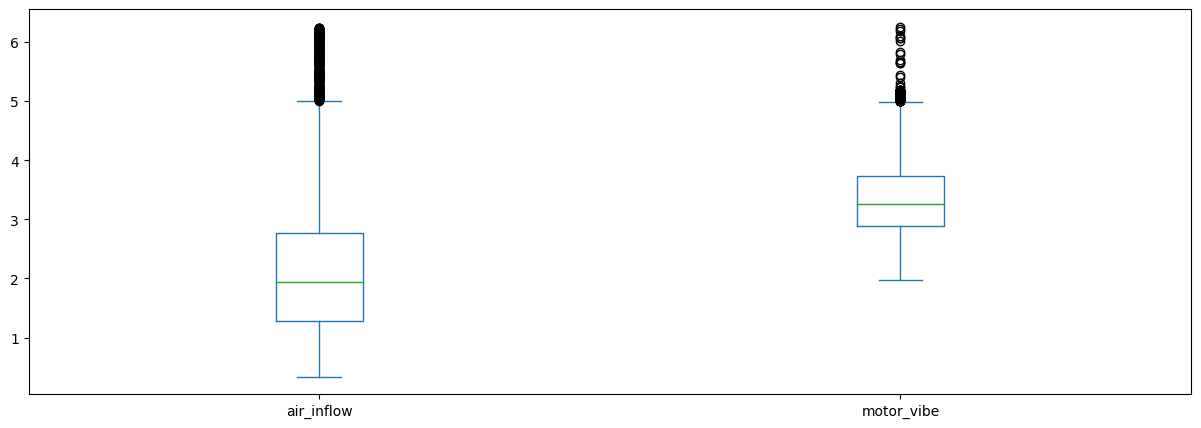

In [117]:
_=fig, ax=plt.subplots(1, 1, figsize=(15, 5))
_=train_box[["air_inflow", "motor_vibe"]].plot.box(ax=ax)

모터 전류, 공기 흡입 유량, 모터 진동은 이상치가 존재한다. 스케일링을 진행한 뒤에 제거해야할 필요가 있다.

# 6. 스케일링 진행하기

## 6-1. 스케일링 선택 기준

이상치 확인하다 보니까, 스케일링이 더 시급해보인다.
* 표준화 : 평균을 0, 분산을 1로 스케일링 진행하기.
* 정규화 : 모든 특성들을 [0, 1] 범위를 갖게 만들기.

* 가우시안 분포를 따르는 경우 : StandardScaler
* 가우시안 분포를 따르지 않는 경우 : MinMaxScaler

In [126]:
train_copy.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type'],
      dtype='object')

## 6-2. Q-Q 플롯 그리기

* 직선의 형태인 경우 : 정규성을 따른다, StandardScaler? 
* 휘어진 형태인 경우 : 정규성을 따르지 않는다, MinMaxScaler?

(-4.108659344476898, 4.108659344476898, -25.735784386312503, 80.57165392210896)

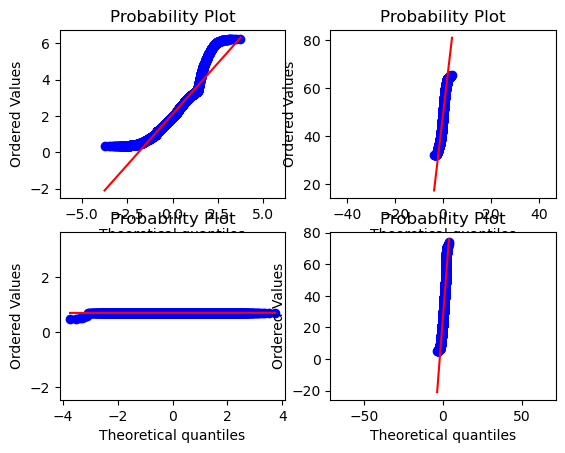

In [145]:
ax1 = plt.subplot(221)
res = stats.probplot(train_copy["air_inflow"], plot=plt)
plt.axis("equal")

ax2 = plt.subplot(222)
res = stats.probplot(train_copy["air_end_temp"], plot=plt)
plt.axis("equal")

ax3 = plt.subplot(223)
res = stats.probplot(train_copy["out_pressure"], plot=plt)
plt.axis("equal")

ax4 = plt.subplot(224)
res = stats.probplot(train_copy["motor_current"], plot=plt)
plt.axis("equal")

* 공기 흡입 유량 : 정규성 X 
* 공기 말단 온도, 토출 압력, 모터 전류 : 정규성 O

(-4.108659344476898, 4.108659344476898, -5.840674471522509, 11.755412595761243)

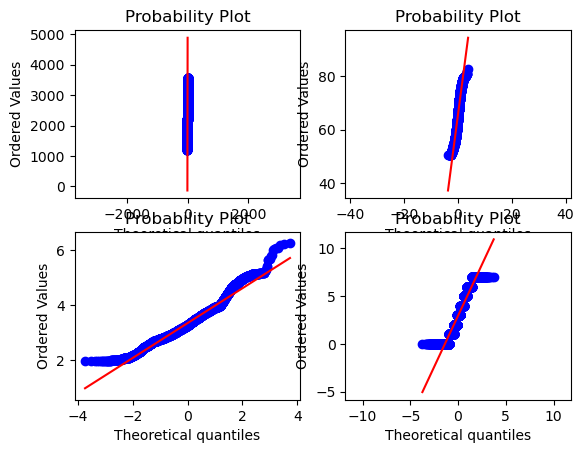

In [146]:
ax5 = plt.subplot(221)
res = stats.probplot(train_copy["motor_rpm"], plot=plt)
plt.axis("equal")

ax6 = plt.subplot(222)
res = stats.probplot(train_copy["motor_temp"], plot=plt)
plt.axis("equal")

ax7 = plt.subplot(223)
res = stats.probplot(train_copy["motor_vibe"], plot=plt)
plt.axis("equal")

ax8 = plt.subplot(224)
res = stats.probplot(train_copy["type"], plot=plt)
plt.axis("equal")

* 모터 회전수, 모터 온도 : 정규성 O
* 모터 진동, 설비 번호 : 정규성 X

In [147]:
# 그러면 정규성 유무에 따라서 각각 스케일링을 적용해야 하는가?